# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**

Abhiram Jyosyula


In Part 5, we will be comparing several ML algorithms for build regression models of PARP-1 inhibitors.



## **1. Import libraries**

In [1]:
! pip install lazypredict

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [3]:
df = pd.read_csv('PARP1_06_bioactivity_data_2class_pIC50_pubchem_fp.csv')

In [4]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [5]:
# Examine X dimension
X.shape

(2823, 881)

In [6]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(2823, 126)

In [7]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [8]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:31<00:00,  1.33it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 378
[LightGBM] [Info] Number of data points in the train set: 2258, number of used features: 126
[LightGBM] [Info] Start training from score 7.081718
'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:28<00:00,  1.48it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 378
[LightGBM] [Info] Number of data points in the train set: 2258, number of used features: 126
[LightGBM] [Info] Start training from score 7.081718


In [9]:
# Performance table of the training set (80% subset)
predictions_train

Adjusted R-Squared  \
Model                                                         
DecisionTreeRegressor                                  0.86   
ExtraTreeRegressor                                     0.86   
ExtraTreesRegressor                                    0.86   
GaussianProcessRegressor                               0.86   
XGBRegressor                                           0.84   
RandomForestRegressor                                  0.82   
BaggingRegressor                                       0.81   
MLPRegressor                                           0.79   
HistGradientBoostingRegressor                          0.74   
LGBMRegressor                                          0.72   
NuSVR                                                  0.62   
SVR                                                    0.62   
KNeighborsRegressor                                    0.62   
GradientBoostingRegressor                              0.57   
LinearRegression                                       0.45   
TransformedTargetRegressor                             0.45   
Ridge                                                  0.45   
RidgeCV                                                0.44   
LassoCV                                                0.44   
ElasticNetCV                                           0.44   
BayesianRidge                                          0.43   
HuberRegressor                                         0.42   
SGDRegressor                                           0.42   
LinearSVR                                              0.41   
PoissonRegressor                                       0.39   
TweedieRegressor                                       0.33   
GammaRegressor                                         0.33   
LassoLarsCV                                            0.32   
LassoLarsIC                                            0.32   
OrthogonalMatchingPursuit                              0.30   
OrthogonalMatchingPursuitCV                            0.30   
AdaBoostRegressor                                      0.23   
LarsCV                                                 0.04   
PassiveAggressiveRegressor                            -0.05   
Lasso                                                 -0.06   
ElasticNet                                            -0.06   
DummyRegressor                                        -0.06   
LassoLars                                             -0.06   
KernelRidge                                          -31.86   
Lars                                              -36825.03   
RANSACRegressor               -1705971020038559957516288.00   

                                                  R-Squared             RMSE  \
Model                                                                          
DecisionTreeRegressor                                  0.87             0.47   
ExtraTreeRegressor                                     0.87             0.47   
ExtraTreesRegressor                                    0.87             0.47   
GaussianProcessRegressor                               0.87             0.47   
XGBRegressor                                           0.85             0.49   
RandomForestRegressor                                  0.83             0.52   
BaggingRegressor                                       0.82             0.55   
MLPRegressor                                           0.80             0.57   
HistGradientBoostingRegressor                          0.75             0.64   
LGBMRegressor                                          0.74             0.66   
NuSVR                                                  0.64             0.77   
SVR                                                    0.64             0.77   
KNeighborsRegressor                                    0.64             0.77   
GradientBoostingRegressor                              0.59             0.82   
LinearRegression                                   

In [10]:
# Performance table of the test set (20% subset)
predictions_test

Adjusted R-Squared  \
Model                                                            
HistGradientBoostingRegressor                             0.35   
SVR                                                       0.34   
NuSVR                                                     0.33   
LGBMRegressor                                             0.32   
RandomForestRegressor                                     0.31   
MLPRegressor                                              0.30   
GradientBoostingRegressor                                 0.30   
XGBRegressor                                              0.28   
BaggingRegressor                                          0.25   
KNeighborsRegressor                                       0.24   
BayesianRidge                                             0.20   
ElasticNetCV                                              0.20   
LassoCV                                                   0.20   
RidgeCV                                                   0.19   
HuberRegressor                                            0.18   
PoissonRegressor                                          0.18   
SGDRegressor                                              0.18   
Ridge                                                     0.17   
LinearSVR                                                 0.17   
TweedieRegressor                                          0.16   
LassoLarsCV                                               0.16   
LassoLarsIC                                               0.15   
GammaRegressor                                            0.15   
OrthogonalMatchingPursuitCV                               0.14   
OrthogonalMatchingPursuit                                 0.14   
ExtraTreesRegressor                                       0.14   
ExtraTreeRegressor                                        0.11   
DecisionTreeRegressor                                     0.10   
AdaBoostRegressor                                        -0.07   
LarsCV                                                   -0.16   
Lasso                                                    -0.29   
ElasticNet                                               -0.29   
DummyRegressor                                           -0.29   
LassoLars                                                -0.29   
PassiveAggressiveRegressor                               -0.44   
GaussianProcessRegressor                                -16.69   
KernelRidge                                             -42.38   
LinearRegression                   -10833192982283787698176.00   
TransformedTargetRegressor         -10833192982283787698176.00   
RANSACRegressor                  -2122618966382130644385792.00   
Lars                          -3216945918023506615366320128.00   

                                                     R-Squared  \
Model                                                            
HistGradientBoostingRegressor                             0.49   
SVR                                                       0.49   
NuSVR                                                     0.48   
LGBMRegressor                                             0.47   
RandomForestRegressor                                     0.47   
MLPRegressor                                              0.46   
GradientBoostingRegressor                                 0.46   
XGBRegressor                                              0.44   
BaggingRegressor                                          0.42   
KNeighborsRegressor                                       0.41   
BayesianRidge                                             0.38   
ElasticNetCV                                              0.38   
LassoCV                                                   0.38   
RidgeCV                                                   0.37   
HuberRegressor                                            0.37   
PoissonRegressor                                          0.36   
SGDRegressor     

## **5. Data visualization of model performance**

[(0.0, 1.0)]

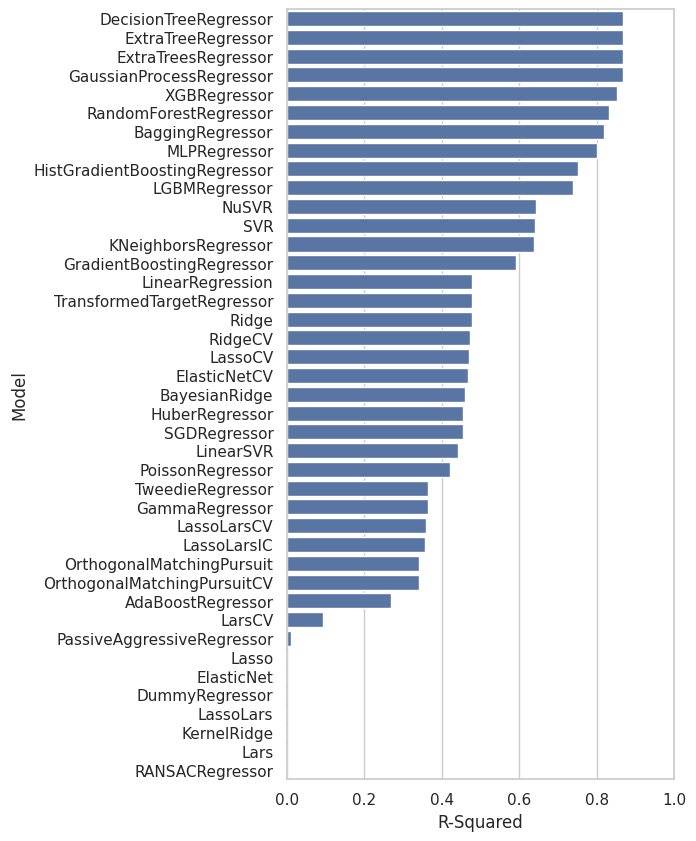

In [11]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

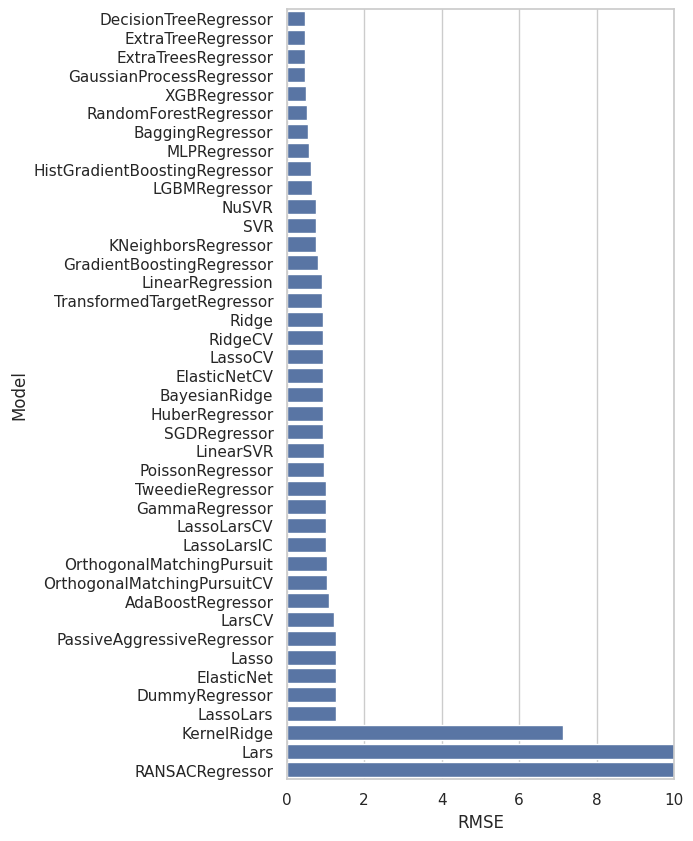

In [12]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

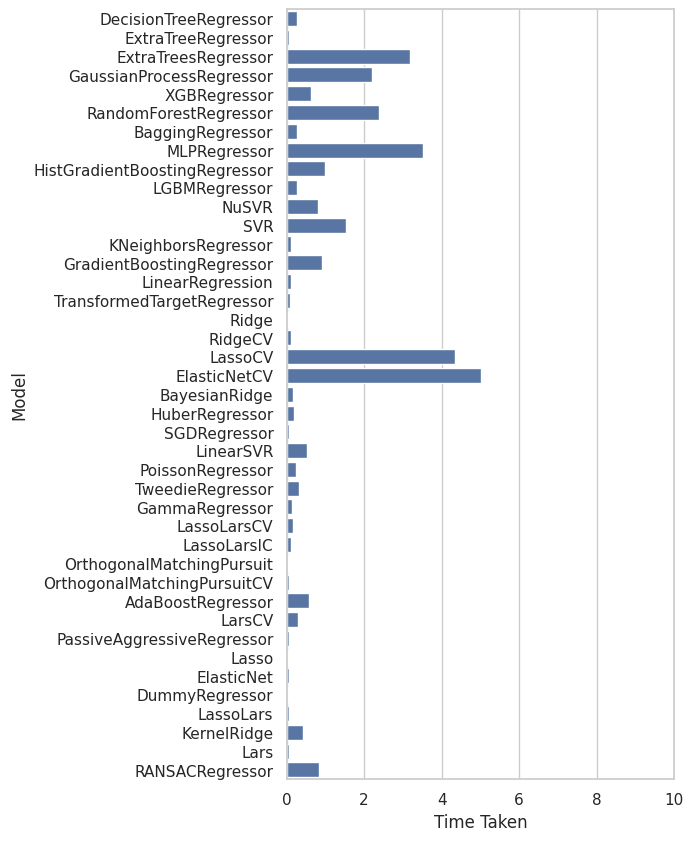

In [13]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))